# Predicting Local Weather Using Machine Learning

## Project Overview
This project demonstrates a data-driven approach to predicting local weather conditions using historical meteorological data.  
By analyzing temperature, humidity, wind, and pressure readings, we develop a predictive model to estimate future weather patterns for a given location.

The workflow includes:
- Loading and exploring the dataset
- Cleaning and preprocessing the data
- Applying regression or classification algorithms
- Evaluating model performance
- Interpreting results and providing actionable insights

## 1. Data Loading and Overview
The dataset (`local_weather.csv`) contains recorded weather attributes collected locally over a given time period.  
We begin by loading the dataset and reviewing its structure to understand available features and data quality.

Key steps in this section:
- Load dataset into a pandas DataFrame
- Display sample records
- Inspect data types and missing values

In [1]:
import pandas as pd

In [2]:
weather = pd.read_csv('local_weather.csv', index_col='DATE')

## 2. Exploratory Data Analysis (EDA)
In this section, we explore the key features of the dataset to identify trends, correlations, and potential issues.  
Descriptive statistics and visualizations help assess data distribution and variability, guiding preprocessing decisions.

In [3]:
weather.head()

,STATION,NAME,ACMH,ACSH,AWND,DAPR,FMTM,FRGT,MDPR,PGTM,...,WT01,WT02,WT03,WT04,WT05,WT07,WT08,WT09,WT16,WT18
DATE,,,,,,,,,,,,,,,,,,,,,
1960-01-01,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-02,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1960-01-03,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-04,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-05,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [4]:
weather.apply(pd.isnull).sum()/weather.shape[0]

STATION    0.000000
NAME       0.000000
ACMH       0.653360
ACSH       0.653360
AWND       0.522451
DAPR       0.999525
FMTM       0.870099
FRGT       0.999881
MDPR       0.999525
PGTM       0.495106
PRCP       0.016668
SNOW       0.324990
SNWD       0.317634
TAVG       0.879174
TMAX       0.000534
TMIN       0.000593
TSUN       0.931728
WDF1       0.653360
WDF2       0.522392
WDF5       0.527552
WDFG       0.746901
WSF1       0.653360
WSF2       0.522332
WSF5       0.527552
WSFG       0.746901
WT01       0.779939
WT02       0.980248
WT03       0.992941
WT04       0.999763
WT05       0.998339
WT07       0.999881
WT08       0.810368
WT09       0.999881
WT16       0.884038
WT18       0.999822
dtype: float64

## 3. Data Preprocessing
Data preprocessing ensures the dataset is clean, consistent, and suitable for modeling.  
Typical steps include handling missing values, encoding categorical variables, and scaling numerical features.

In [5]:
core_weather = weather [['PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN']].copy()

In [6]:
core_weather.columns = ['precip', 'snow', 'snow_depth', 'temp_max', 'temp_min']
core_weather

,precip,snow,snow_depth,temp_max,temp_min
DATE,,,,,
1960-01-01,0.0,0.0,0.0,49.0,30.0
1960-01-02,0.0,0.0,0.0,49.0,29.0
1960-01-03,0.0,0.0,0.0,54.0,35.0
1960-01-04,0.0,0.0,0.0,54.0,36.0
1960-01-05,0.0,0.0,0.0,55.0,33.0
...,...,...,...,...,...
2022-01-24,0.0,NaN,NaN,60.0,39.0
2022-01-25,0.0,NaN,NaN,57.0,43.0
2022-01-26,0.0,NaN,NaN,57.0,41.0


## 4. Model Development
We develop a predictive model using supervised learning techniques to estimate weather conditions.  
The model is trained on historical data and evaluated using standard metrics to ensure robust performance.

In [7]:
core_weather.apply(pd.isnull).sum()/core_weather.shape[0]

precip        0.016668
snow          0.324990
snow_depth    0.317634
temp_max      0.000534
temp_min      0.000593
dtype: float64

In [8]:
core_weather['snow'].value_counts()

snow
0.0    11379
1.0        1
Name: count, dtype: int64

## 5. Model Evaluation and Insights
After training, we evaluate the model using metrics such as Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), or accuracy, depending on the prediction target.  
Visualizations and comparison charts highlight performance strengths and limitations.

In [9]:
del core_weather['snow']

In [10]:
core_weather['snow_depth'].value_counts()

snow_depth
0.0    11504
Name: count, dtype: int64

In [11]:
del core_weather['snow_depth']

In [12]:
core_weather['temp_max'].isnull().sum()

np.int64(9)

In [13]:
core_weather[pd.isnull(core_weather['temp_max'])]

,precip,temp_max,temp_min
DATE,,,
2004-11-20,NaN,NaN,NaN
2013-06-16,0.0,NaN,NaN
2019-04-18,0.0,NaN,50.0
2019-04-21,0.0,NaN,52.0
2019-04-22,0.0,NaN,50.0
2020-08-29,0.0,NaN,NaN
2020-09-08,0.0,NaN,NaN
2020-09-09,0.0,NaN,NaN
2021-10-31,0.0,NaN,56.0


In [15]:
core_weather['temp_max'] = core_weather['temp_max'].ffill()
core_weather['temp_min'] = core_weather['temp_min'].ffill()
core_weather['precip'] = core_weather['precip'].ffill()

In [16]:
core_weather.apply(pd.isnull).sum()/core_weather.shape[0]

precip      0.0
temp_max    0.0
temp_min    0.0
dtype: float64

In [17]:
core_weather.dtypes

precip      float64
temp_max    float64
temp_min    float64
dtype: object

In [18]:
core_weather.index

Index(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04', '1960-01-05',
       '1960-01-06', '1960-01-07', '1960-01-08', '1960-01-09', '1960-01-10',
       ...
       '2022-01-19', '2022-01-20', '2022-01-21', '2022-01-22', '2022-01-23',
       '2022-01-24', '2022-01-25', '2022-01-26', '2022-01-27', '2022-01-28'],
      dtype='object', name='DATE', length=16859)

In [19]:
core_weather.index = pd.to_datetime(core_weather.index)
core_weather.index

DatetimeIndex(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04',
               '1960-01-05', '1960-01-06', '1960-01-07', '1960-01-08',
               '1960-01-09', '1960-01-10',
               ...
               '2022-01-19', '2022-01-20', '2022-01-21', '2022-01-22',
               '2022-01-23', '2022-01-24', '2022-01-25', '2022-01-26',
               '2022-01-27', '2022-01-28'],
              dtype='datetime64[ns]', name='DATE', length=16859, freq=None)

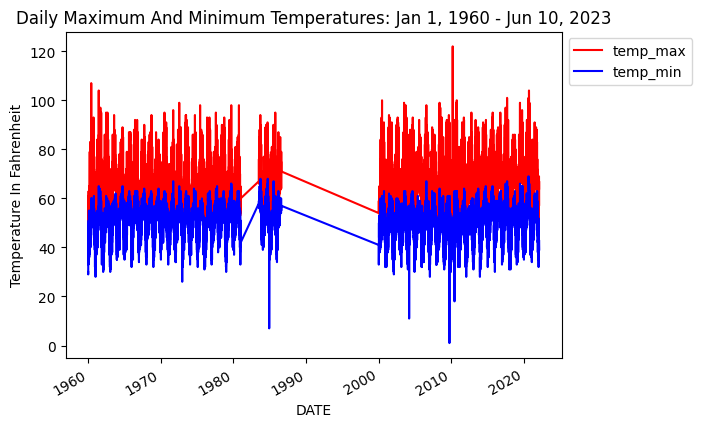

In [20]:
title = 'Daily Maximum and Minimum Temperatures: Jan 1, 1960 - Jun 10, 2023'.title()
ylabel = 'Temperature in Fahrenheit'.title()
colors = ['red', 'blue']

core_weather[['temp_max', 'temp_min']].plot(title=title, ylabel=ylabel, color=colors).legend(bbox_to_anchor=(1.0, 1.0))

<Axes: title={'center': 'Daily Precipitation: Jan 1, 1960 - Jun 10, 2023'}, xlabel='DATE', ylabel='Precipitation In Inches'>

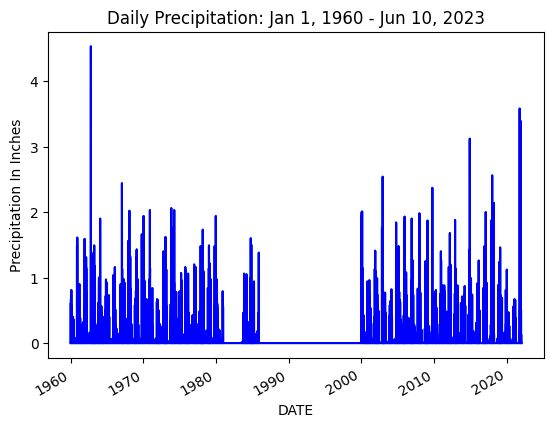

In [71]:
core_weather['precip'].plot(ylabel='Precipitation in inches')

title = 'Daily Precipitation: Jan 1, 1960 - Jun 10, 2023'.title()
ylabel = 'Precipitation in inches'.title()
color = 'blue'

core_weather['precip'].plot(title=title, ylabel=ylabel, color=color)

In [21]:
core_weather['target'] = core_weather['temp_max'].shift(-1)
core_weather

,precip,temp_max,temp_min,target
DATE,,,,
1960-01-01,0.0,49.0,30.0,49.0
1960-01-02,0.0,49.0,29.0,54.0
1960-01-03,0.0,54.0,35.0,54.0
1960-01-04,0.0,54.0,36.0,55.0
1960-01-05,0.0,55.0,33.0,53.0
...,...,...,...,...
2022-01-24,0.0,60.0,39.0,57.0
2022-01-25,0.0,57.0,43.0,57.0
2022-01-26,0.0,57.0,41.0,67.0


In [22]:
core_weather = core_weather.iloc[:-1].copy()
core_weather

,precip,temp_max,temp_min,target
DATE,,,,
1960-01-01,0.0,49.0,30.0,49.0
1960-01-02,0.0,49.0,29.0,54.0
1960-01-03,0.0,54.0,35.0,54.0
1960-01-04,0.0,54.0,36.0,55.0
1960-01-05,0.0,55.0,33.0,53.0
...,...,...,...,...
2022-01-23,0.0,60.0,41.0,60.0
2022-01-24,0.0,60.0,39.0,57.0
2022-01-25,0.0,57.0,43.0,57.0


In [23]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha=.1)

In [24]:
predictors = ['precip', 'temp_max', 'temp_min']

In [25]:
train = core_weather.loc[:'2021-01-10']
test = core_weather.loc['2021-01-01':]

In [26]:
train.isnull().sum()

precip      0
temp_max    0
temp_min    0
target      0
dtype: int64

In [27]:
reg.fit(train[predictors], train['target'])

,alpha,0.1
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [28]:
predictions = reg.predict(test[predictors])

In [29]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(test['target'], predictions)

3.4113493789232847

In [30]:
combined = pd.concat([test['target'], pd.Series(predictions, index=test.index)], axis=1)
combined.columns = ['actual', 'predictions']
combined

,actual,predictions
DATE,,
2021-01-01,57.0,59.806911
2021-01-02,56.0,59.311197
2021-01-03,62.0,58.542067
2021-01-04,59.0,61.526895
2021-01-05,59.0,59.445734
...,...,...
2022-01-23,60.0,59.986776
2022-01-24,57.0,59.627045
2022-01-25,57.0,58.183783


<Axes: title={'center': 'Actual And Predicted Temperatures: Jan 1, 2021 - Jun 9, 2023'}, xlabel='DATE', ylabel='Temperature In Fahrenheit'>

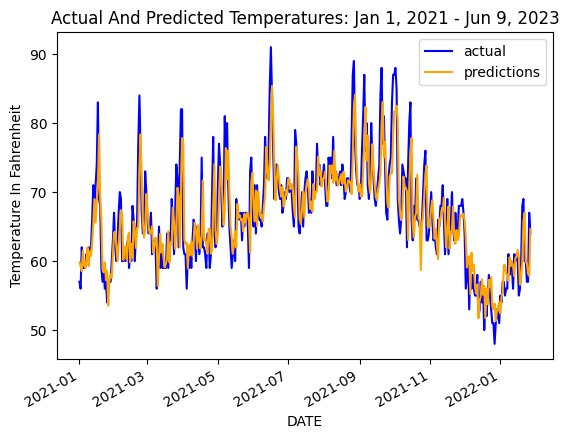

In [31]:
title = 'Actual and Predicted Temperatures: Jan 1, 2021 - Jun 9, 2023'.title()
ylabel = 'Temperature in Fahrenheit'.title()
colors = ['blue', 'orange']

combined.plot(title=title, ylabel=ylabel, color=colors)

In [32]:
reg.coef_

array([-2.22506479,  0.72090779,  0.1798653 ])

In [34]:
def create_predictions(predictors, core_weather, reg):
    '''
    Using columns from the core_weather dataset and the model, 
    we'll make predictions.
    '''
    
    # split the dataset into train and test
    train = core_weather.loc[:'2021-01-10']
    test = core_weather.loc['2021-01-01':]
    
    # fit the model
    reg.fit(train[predictors], train['target'])
    
    # make predictions
    predictions = reg.predict(test[predictors])
    
    # error metric
    error = mean_absolute_error(test['target'], predictions)
    
    # combine actual values with predicted values
    combined = pd.concat([test['target'], pd.Series(predictions, index=test.index)], axis=1)
    combined.columns = ['actual', 'predictions']
    
    return error, combined
    

In [35]:
core_weather['month_max'] = core_weather['temp_max'].rolling(30).mean()
core_weather

,precip,temp_max,temp_min,target,month_max
DATE,,,,,
1960-01-01,0.0,49.0,30.0,49.0,NaN
1960-01-02,0.0,49.0,29.0,54.0,NaN
1960-01-03,0.0,54.0,35.0,54.0,NaN
1960-01-04,0.0,54.0,36.0,55.0,NaN
1960-01-05,0.0,55.0,33.0,53.0,NaN
...,...,...,...,...,...
2022-01-23,0.0,60.0,41.0,60.0,56.900000
2022-01-24,0.0,60.0,39.0,57.0,57.066667
2022-01-25,0.0,57.0,43.0,57.0,57.200000


In [36]:
core_weather['month_day_max'] = core_weather['month_max'] / core_weather['temp_max'] 
core_weather['max_min'] = core_weather['temp_max'] / core_weather['temp_min'] 

In [37]:
predictors = ['precip', 'temp_max', 'temp_min', 'month_max', 'month_day_max', 'max_min']
core_weather = core_weather.iloc[30:,:].copy()

error, combined = create_predictions(predictors, core_weather, reg)
error

3.3599153577201233

<Axes: title={'center': 'Actual And Predicted Temperatures: Jan 31, 2021 - Jun 9, 2023'}, xlabel='DATE', ylabel='Temperature In Fahrenheit'>

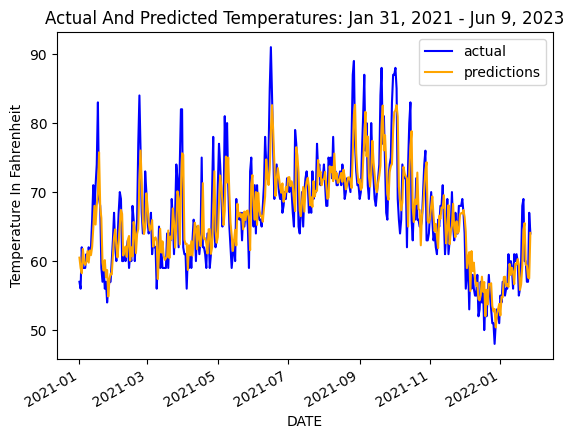

In [38]:
title = 'Actual and Predicted Temperatures: Jan 31, 2021 - Jun 9, 2023'.title()
ylabel = 'Temperature in Fahrenheit'.title()
colors = ['blue', 'orange']

combined.plot(title=title, ylabel=ylabel, color=colors)

In [39]:
core_weather['monthly_avg'] = core_weather['temp_max'].groupby(core_weather.index.month, group_keys=False).apply(lambda x: x.expanding(1).mean())
core_weather

,precip,temp_max,temp_min,target,month_max,month_day_max,max_min,monthly_avg
DATE,,,,,,,,
1960-01-31,0.00,59.0,46.0,62.0,55.566667,0.941808,1.282609,59.000000
1960-02-01,0.81,62.0,51.0,59.0,56.000000,0.903226,1.215686,62.000000
1960-02-02,0.00,59.0,43.0,59.0,56.166667,0.951977,1.372093,60.500000
1960-02-03,0.20,59.0,47.0,60.0,56.333333,0.954802,1.255319,60.000000
1960-02-04,0.16,60.0,42.0,60.0,56.500000,0.941667,1.428571,60.000000
...,...,...,...,...,...,...,...,...
2022-01-23,0.00,60.0,41.0,60.0,56.900000,0.948333,1.463415,56.781536
2022-01-24,0.00,60.0,39.0,57.0,57.066667,0.951111,1.538462,56.783803
2022-01-25,0.00,57.0,43.0,57.0,57.200000,1.003509,1.325581,56.783955


In [40]:
core_weather['day_of_year_avg'] = core_weather['temp_max'].groupby(core_weather.index.day_of_year, group_keys=False).apply(lambda x: x.expanding(1).mean())
core_weather

,precip,temp_max,temp_min,target,month_max,month_day_max,max_min,monthly_avg,day_of_year_avg
DATE,,,,,,,,,
1960-01-31,0.00,59.0,46.0,62.0,55.566667,0.941808,1.282609,59.000000,59.000000
1960-02-01,0.81,62.0,51.0,59.0,56.000000,0.903226,1.215686,62.000000,62.000000
1960-02-02,0.00,59.0,43.0,59.0,56.166667,0.951977,1.372093,60.500000,59.000000
1960-02-03,0.20,59.0,47.0,60.0,56.333333,0.954802,1.255319,60.000000,59.000000
1960-02-04,0.16,60.0,42.0,60.0,56.500000,0.941667,1.428571,60.000000,60.000000
...,...,...,...,...,...,...,...,...,...
2022-01-23,0.00,60.0,41.0,60.0,56.900000,0.948333,1.463415,56.781536,57.130435
2022-01-24,0.00,60.0,39.0,57.0,57.066667,0.951111,1.538462,56.783803,57.239130
2022-01-25,0.00,57.0,43.0,57.0,57.200000,1.003509,1.325581,56.783955,57.347826


In [41]:
predictors = ['precip', 'temp_max', 'temp_min', 'month_max', 'month_day_max', 'max_min', 'monthly_avg', 'day_of_year_avg']
error, combined = create_predictions(predictors, core_weather, reg)
error

3.317486019895737

## 6. Conclusion
This project demonstrates how machine learning can support short-term weather prediction based on local data.  
With further optimization (e.g., hyperparameter tuning or feature engineering), the model could achieve higher accuracy and better generalization across different weather conditions.

**Next Steps:**
- Incorporate additional external datasets (e.g., satellite data)
- Implement time-series modeling (e.g., LSTM or ARIMA)
- Deploy the model for live prediction in a dashboard or web app